# 1. Тема

Прогнозування поточної ринкової вартості автомобіля на основі його технічних характеристик та експлуатаційних показників із використанням методів множинної лінійної регресії.

# 2. Автор роботи

Виконав студент  
групи **R-11**  
**Шмигельський Давид Володимирович**

Спеціальність: **Комп’ютерні науки**  
Дисципліна: **Аналіз та візуалізація даних у R**

# 3. Опис проблеми та мети

Ринок автомобілів є динамічним та залежить від багатьох технічних і експлуатаційних характеристик транспортного засобу. Для покупців актуально визначити справедливу ринкову вартість автомобіля, а для продавців — правильно сформувати ціну з урахуванням основних факторів.

Проблема полягає у визначенні того, які саме характеристики автомобіля найбільше впливають на його поточну ринкову вартість та наскільки точно цю вартість можна спрогнозувати за допомогою математичної моделі.

**Мета роботи** — побудувати регресійну модель для прогнозування поточної ринкової ціни автомобіля на основі його технічних характеристик та експлуатаційних показників, а також оцінити точність побудованої моделі.

# 4. Опис набору даних

Для виконання проєкту було використано набір даних з інформацією про автомобілі та їхню поточну ринкову вартість. Набір даних містить **1000 спостережень** та **12 числових ознак**. Дані використовуються у форматі CSV-файлу `train.csv`.

Набір даних включає такі змінні:

- **v.id** — ідентифікатор запису  
- **on road old** — первинна ринкова вартість автомобіля при виході на ринок  
- **on road now** — поточна ринкова вартість нового автомобіля  
- **years** — вік автомобіля у роках  
- **km** — пробіг автомобіля у кілометрах  
- **rating** — рейтинг автомобіля  
- **condition** — технічний стан автомобіля  
- **economy** — показник економічності  
- **top speed** — максимальна швидкість  
- **hp** — потужність двигуна (кінські сили)  
- **torque** — крутний момент  
- **current price** — поточна ринкова ціна автомобіля (цільова змінна)

Усі змінні мають числовий тип даних, а пропущені значення у наборі даних відсутні.

In [17]:
library(dplyr)
library(ggplot2)
library(corrplot)

# Встановлюємо робочу директорію
setwd("C:/Users/Graf David/R/FinalProject")

# Завантаження датасету
df <- readr::read_csv("dataset/train.csv", show_col_types = FALSE)

cat("\n==============================\n")
cat("DATASET LOADED SUCCESSFULLY\n")
cat("==============================\n\n")

# Розміри датасету
cat("===== DATASET DIMENSIONS =====\n")
print(dim(df))

# Назви колонок
cat("\n===== COLUMN NAMES =====\n")
print(colnames(df))

# Структура даних
cat("\n===== DATA STRUCTURE (str) =====\n")
str(df)

# Перші 6 рядків
cat("\n===== FIRST 6 ROWS (head) =====\n")
print(head(df))



DATASET LOADED SUCCESSFULLY

===== DATASET DIMENSIONS =====
[1] 1000   12

===== COLUMN NAMES =====
 [1] "v.id"          "on road old"   "on road now"   "years"        
 [5] "km"            "rating"        "condition"     "economy"      
 [9] "top speed"     "hp"            "torque"        "current price"

===== DATA STRUCTURE (str) =====
spc_tbl_ [1,000 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ v.id         : num [1:1000] 1 2 3 4 5 6 7 8 9 10 ...
 $ on road old  : num [1:1000] 535651 591911 686990 573999 691388 ...
 $ on road now  : num [1:1000] 798186 861056 770762 722381 811335 ...
 $ years        : num [1:1000] 3 6 2 4 6 6 5 6 7 2 ...
 $ km           : num [1:1000] 78945 117220 132538 101065 61559 ...
 $ rating       : num [1:1000] 1 5 2 4 3 2 1 1 4 2 ...
 $ condition    : num [1:1000] 2 9 8 3 9 9 9 2 7 3 ...
 $ economy      : num [1:1000] 14 9 15 11 12 13 15 12 14 12 ...
 $ top speed    : num [1:1000] 177 148 181 197 160 138 171 146 151 200 ...
 $ hp           : num [1:100

# 5. Описовий аналіз даних з візуалізацією (EDA)

Описовий аналіз даних (EDA) використовується для вивчення розподілу змінних, виявлення закономірностей, можливих викидів та попередньої оцінки зв’язків між характеристиками автомобіля та його поточною ціною.

На даному етапі було проаналізовано:
- розподіл цільової змінної `current price`,
- розподіли ключових числових ознак (`years`, `km`, `condition`),
- кореляційні зв’язки між змінними.

In [19]:
library(dplyr)
library(ggplot2)

setwd("C:/Users/Graf David/R/FinalProject")
df <- readr::read_csv("dataset/train.csv", show_col_types = FALSE)
cat("First 5 rows:\n")
print(head(df, 5))


First 5 rows:
# A tibble: 5 × 12
   v.id `on road old` `on road now` years     km rating condition economy
  <dbl>         <dbl>         <dbl> <dbl>  <dbl>  <dbl>     <dbl>   <dbl>
1     1        535651        798186     3  78945      1         2      14
2     2        591911        861056     6 117220      5         9       9
3     3        686990        770762     2 132538      2         8      15
4     4        573999        722381     4 101065      4         3      11
5     5        691388        811335     6  61559      3         9      12
# ℹ 4 more variables: `top speed` <dbl>, hp <dbl>, torque <dbl>,
#   `current price` <dbl>


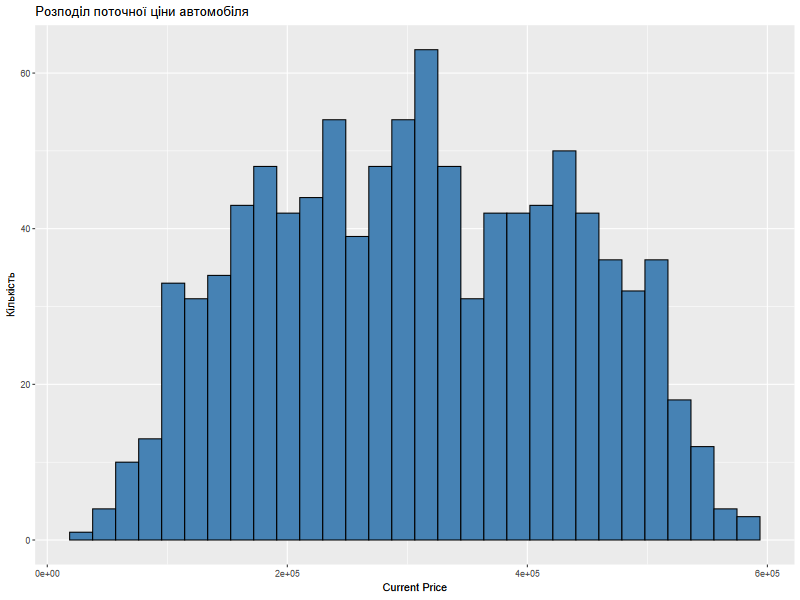

In [3]:
ggplot(df, aes(x = `current price`)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black") +
  labs(
    title = "Розподіл поточної ціни автомобіля",
    x = "Current Price",
    y = "Кількість"
  )


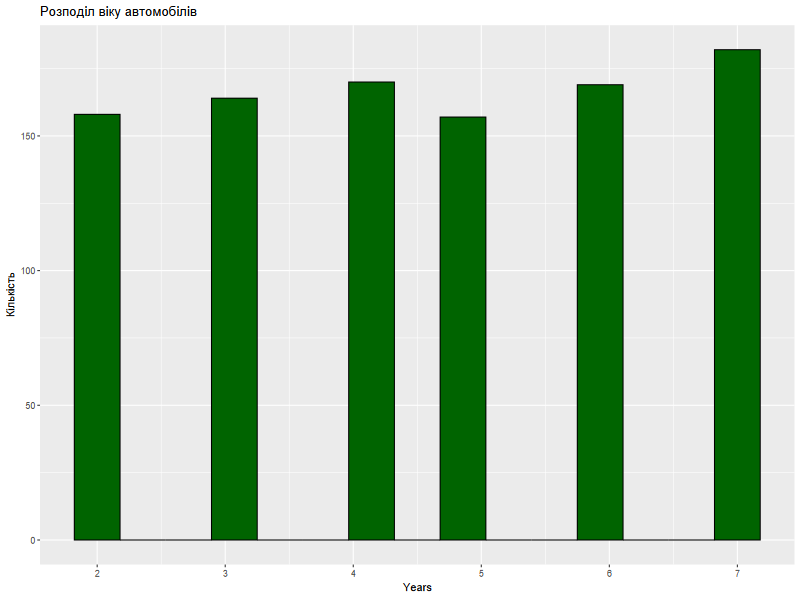

In [4]:
ggplot(df, aes(x = years)) +
  geom_histogram(bins = 15, fill = "darkgreen", color = "black") +
  labs(
    title = "Розподіл віку автомобілів",
    x = "Years",
    y = "Кількість"
  )


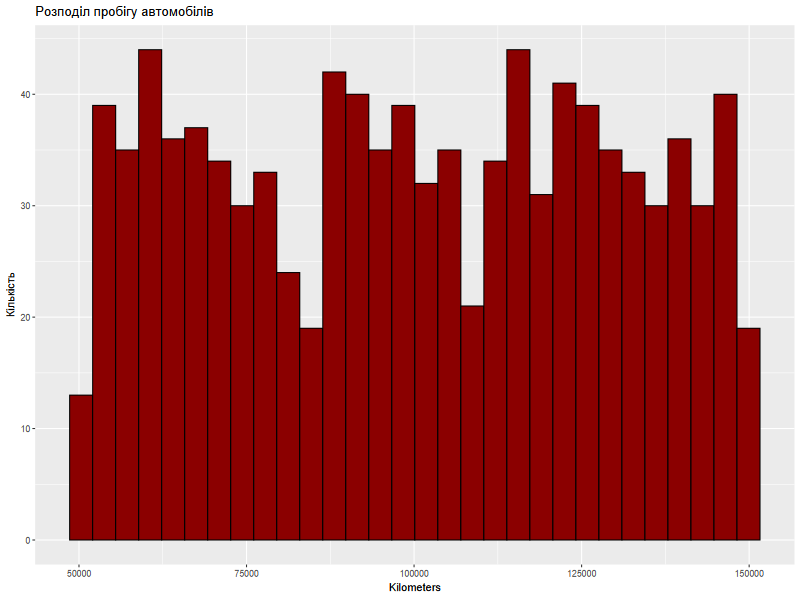

In [5]:
ggplot(df, aes(x = km)) +
  geom_histogram(bins = 30, fill = "darkred", color = "black") +
  labs(
    title = "Розподіл пробігу автомобілів",
    x = "Kilometers",
    y = "Кількість"
  )


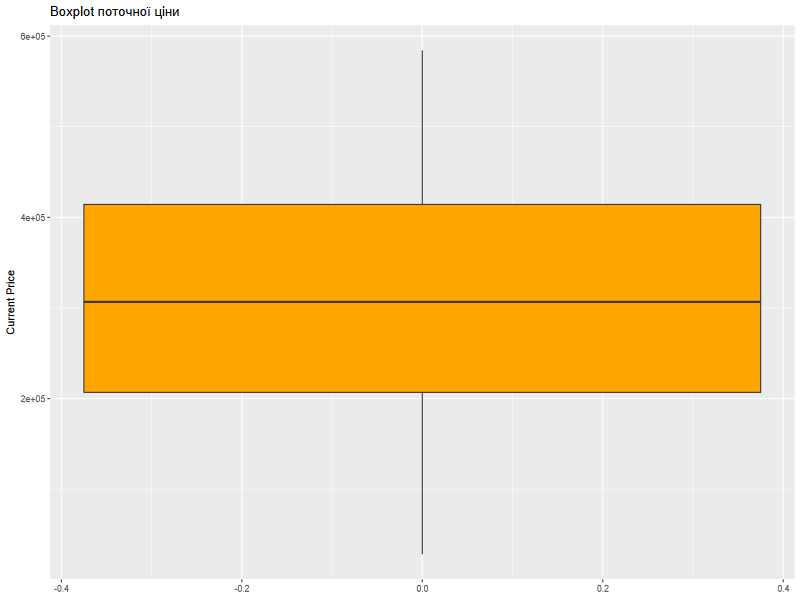

In [6]:
ggplot(df, aes(y = `current price`)) +
  geom_boxplot(fill = "orange") +
  labs(
    title = "Boxplot поточної ціни",
    y = "Current Price"
  )


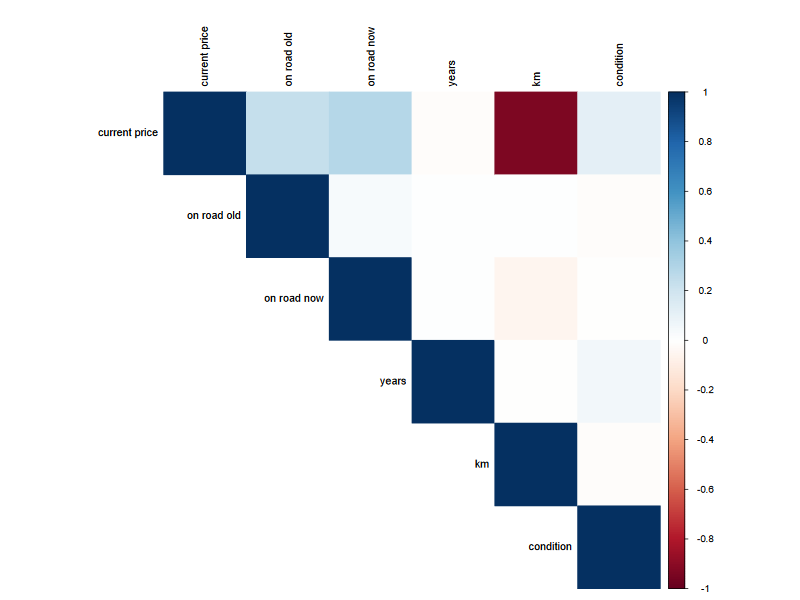

In [7]:
library(corrplot)

corr_vars <- df %>%
  select(
    `current price`,
    `on road old`,
    `on road now`,
    years,
    km,
    condition
  )

corr_matrix <- cor(corr_vars)

corrplot(
  corr_matrix,
  method = "color",
  type = "upper",
  tl.col = "black",
  tl.cex = 0.9
)


За результатами описового аналізу встановлено, що:

- Поточна ціна автомобіля має асиметричний розподіл без екстремальних викидів.
- Пробіг (`km`) має широкий діапазон значень та є одним з ключових факторів зниження вартості.
- Вік автомобіля (`years`) зосереджений у діапазоні від 2 до 7 років.
- Найсильніший негативний кореляційний зв’язок з ціною має показник пробігу (`km`), тоді як `on road old` та `on road now` мають сильний позитивний зв’язок з поточною ціною.


# 6. Попередня підготовка даних

На етапі попередньої підготовки даних було перевірено наявність пропущених значень, типи даних змінних, а також необхідність очищення або трансформації даних.

Оскільки всі змінні у наборі даних мають числовий тип, а пропущені значення відсутні, додаткове заповнення або видалення спостережень не виконувалося. Також перевірено наявність викидів, які могли б негативно вплинути на якість регресійної моделі. За результатами перевірки екстремальні викиди не були виявлені.

In [20]:
cat("\n==============================\n")
cat("MISSING VALUES CHECK\n")
cat("==============================\n")

missing_values <- colSums(is.na(df))
print(missing_values)

cat("\n==============================\n")
cat("DATA TYPES (CLASSES)\n")
cat("==============================\n")

data_types <- sapply(df, class)
print(data_types)

cat("\n==============================\n")
cat("DESCRIPTIVE STATISTICS (SUMMARY)\n")
cat("==============================\n")

summary_stats <- summary(df)
print(summary_stats)



MISSING VALUES CHECK
         v.id   on road old   on road now         years            km 
            0             0             0             0             0 
       rating     condition       economy     top speed            hp 
            0             0             0             0             0 
       torque current price 
            0             0 

DATA TYPES (CLASSES)
         v.id   on road old   on road now         years            km 
    "numeric"     "numeric"     "numeric"     "numeric"     "numeric" 
       rating     condition       economy     top speed            hp 
    "numeric"     "numeric"     "numeric"     "numeric"     "numeric" 
       torque current price 
    "numeric"     "numeric" 

DESCRIPTIVE STATISTICS (SUMMARY)
      v.id         on road old      on road now         years      
 Min.   :   1.0   Min.   :500265   Min.   :700018   Min.   :2.000  
 1st Qu.: 250.8   1st Qu.:548861   1st Qu.:750998   1st Qu.:3.000  
 Median : 500.5   Median :601568  

# 7. Збагачення даних

Збагачення даних шляхом додавання зовнішніх наборів даних у даному проєкті не виконувалося, оскільки наявний набір даних містить достатню кількість технічних та експлуатаційних характеристик для побудови точної регресійної моделі.

Усі необхідні ознаки для аналізу та прогнозування вже присутні у початковому наборі даних.

# 8. Формування тренувальної та тестової вибірки

Для перевірки стійкості та точності побудованої моделі дані були розділені на дві частини:
- **тренувальну вибірку (train)** — 75% даних,
- **тестову вибірку (test)** — 25% даних.

Тренувальна вибірка використовується для навчання регресійної моделі, а тестова — для перевірки її якості на даних, які не брали участі у побудові моделі. Такий підхід дозволяє оцінити здатність моделі до узагальнення та запобігти перенавчанню.

In [21]:
library(dplyr)

cat("\n==============================\n")
cat("TRAIN / TEST SPLIT\n")
cat("==============================\n")

# Видаляємо ідентифікатор
df_model <- df %>% select(-`v.id`)

cat("Original dataset dimensions:\n")
print(dim(df))

cat("\nModel dataset dimensions (without v.id):\n")
print(dim(df_model))

# Фіксуємо генератор випадкових чисел
set.seed(42)

# 75% train, 25% test
sample_size <- floor(0.75 * nrow(df_model))
train_index <- sample(seq_len(nrow(df_model)), size = sample_size)

train_data <- df_model[train_index, ]
test_data  <- df_model[-train_index, ]

cat("\nTrain dataset dimensions:\n")
print(dim(train_data))

cat("\nTest dataset dimensions:\n")
print(dim(test_data))

cat("\nTrain target variable mean (current price):\n")
print(mean(train_data$`current price`))

cat("\nTest target variable mean (current price):\n")
print(mean(test_data$`current price`))



TRAIN / TEST SPLIT
Original dataset dimensions:
[1] 1000   12

Model dataset dimensions (without v.id):
[1] 1000   11

Train dataset dimensions:
[1] 750  11

Test dataset dimensions:
[1] 250  11

Train target variable mean (current price):
[1] 310816.2

Test target variable mean (current price):
[1] 301632.3


In [22]:
cat("\n==============================\n")
cat("FINAL TRAIN / TEST DIMENSIONS CHECK\n")
cat("==============================\n")

cat("\nTrain dataset dimensions (rows, columns):\n")
print(dim(train_data))

cat("\nTest dataset dimensions (rows, columns):\n")
print(dim(test_data))




FINAL TRAIN / TEST DIMENSIONS CHECK

Train dataset dimensions (rows, columns):
[1] 750  11

Test dataset dimensions (rows, columns):
[1] 250  11


In [23]:
cat("\n==============================\n")
cat("FEATURE MEANS COMPARISON\n")
cat("==============================\n")

cat("\n--- TRAIN DATA MEANS ---\n")
train_means <- colMeans(train_data)
print(train_means)

cat("\n--- TEST DATA MEANS ---\n")
test_means <- colMeans(test_data)
print(test_means)



FEATURE MEANS COMPARISON

--- TRAIN DATA MEANS ---
  on road old   on road now         years            km        rating 
 6.045492e+05  7.998915e+05  4.528000e+00  1.001655e+05  2.950667e+00 
    condition       economy     top speed            hp        torque 
 5.558667e+00  1.156933e+01  1.672387e+02  8.462933e+01  1.031373e+02 
current price 
 3.108162e+05 

--- TEST DATA MEANS ---
  on road old   on road now         years            km        rating 
   592945.472    796851.072         4.660    100601.196         3.100 
    condition       economy     top speed            hp        torque 
        5.692        11.792       165.856        84.296       104.280 
current price 
   301632.278 


# 9. Опис метрик оцінки якості моделей

Для оцінки якості побудованої регресійної моделі були використані такі метрики:

## 1. Mean Absolute Error (MAE)

MAE показує середнє абсолютне відхилення прогнозованих значень від реальних:

MAE = (1 / n) * Σ |yᵢ − ŷᵢ|

де:
- yᵢ — реальне значення,
- ŷᵢ — прогнозоване значення,
- n — кількість спостережень.

Ця метрика показує середню помилку прогнозу у тих самих одиницях виміру, що й цільова змінна (ціна).

---

## 2. Root Mean Squared Error (RMSE)

RMSE вимірює середньоквадратичну похибку прогнозу:

RMSE = √[(1 / n) * Σ (yᵢ − ŷᵢ)²]

RMSE сильніше штрафує великі похибки, ніж MAE, тому дозволяє краще оцінювати ризик значних помилок прогнозування.

---

## 3. Коефіцієнт детермінації (R²)

R² показує, яку частку дисперсії цільової змінної пояснює модель:

R² = 1 − (Σ (yᵢ − ŷᵢ)² / Σ (yᵢ − ȳ)²)

де ȳ — середнє значення цільової змінної.

Значення R² наближенe до 1 означає високу пояснювальну здатність моделі.

---

## Обґрунтування вибору метрик

Метрики MAE та RMSE були обрані для оцінки точності прогнозування у грошових одиницях, а коефіцієнт R² — для оцінки загальної якості побудованої моделі. Такий набір метрик є стандартним для задач регресійного аналізу.


# 10. Побудова моделей та вибір кращої

На даному етапі було побудовано дві регресійні моделі:

1. **Повна модель (Full model)** — з використанням усіх доступних ознак.
2. **Скорочена модель (Reduced model)** — з використанням лише статистично значущих змінних.

Скорочену модель було сформовано на основі результатів статистичної значущості коефіцієнтів повної моделі (p-value < 0.05).


In [24]:
cat("\n==============================\n")
cat("FULL LINEAR REGRESSION MODEL\n")
cat("==============================\n")

# Побудова повної регресійної моделі
full_model <- lm(`current price` ~ ., data = train_data)

cat("\n--- MODEL FORMULA ---\n")
print(formula(full_model))

cat("\n--- FULL MODEL SUMMARY ---\n")
full_summary <- summary(full_model)
print(full_summary)

cat("\n--- MODEL QUALITY ---\n")
cat("R-squared:        ", full_summary$r.squared, "\n")
cat("Adjusted R-sq.:  ", full_summary$adj.r.squared, "\n")

cat("\n--- COEFFICIENTS TABLE ---\n")
print(full_summary$coefficients)



FULL LINEAR REGRESSION MODEL

--- MODEL FORMULA ---
`current price` ~ `on road old` + `on road now` + years + km + 
    rating + condition + economy + `top speed` + hp + torque

--- FULL MODEL SUMMARY ---

Call:
lm(formula = `current price` ~ ., data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12514  -7566  -1144   5030  21244 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   -1.523e+04  6.888e+03   -2.211   0.0273 *  
`on road old`  5.058e-01  5.412e-03   93.455   <2e-16 ***
`on road now`  5.019e-01  5.550e-03   90.436   <2e-16 ***
years         -1.622e+03  1.853e+02   -8.750   <2e-16 ***
km            -4.001e+00  1.093e-02 -366.237   <2e-16 ***
rating         4.445e+02  2.271e+02    1.958   0.0507 .  
condition      4.614e+03  1.122e+02   41.128   <2e-16 ***
economy        7.055e+01  1.419e+02    0.497   0.6192    
`top speed`   -1.485e+01  1.635e+01   -0.908   0.3641    
hp             1.614e+01  1.542e+01    1.047   0.2954  

In [25]:
cat("\n==============================\n")
cat("REDUCED LINEAR REGRESSION MODEL\n")
cat("==============================\n")

# Побудова скороченої моделі
reduced_model <- lm(
  `current price` ~ 
    `on road old` + 
    `on road now` + 
    km + 
    condition + 
    years,
  data = train_data
)

cat("\n--- MODEL FORMULA ---\n")
print(formula(reduced_model))

cat("\n--- REDUCED MODEL SUMMARY ---\n")
reduced_summary <- summary(reduced_model)
print(reduced_summary)

cat("\n--- MODEL QUALITY ---\n")
cat("R-squared:        ", reduced_summary$r.squared, "\n")
cat("Adjusted R-sq.:  ", reduced_summary$adj.r.squared, "\n")

cat("\n--- COEFFICIENTS TABLE ---\n")
print(reduced_summary$coefficients)



REDUCED LINEAR REGRESSION MODEL

--- MODEL FORMULA ---
`current price` ~ `on road old` + `on road now` + km + condition + 
    years

--- REDUCED MODEL SUMMARY ---

Call:
lm(formula = `current price` ~ `on road old` + `on road now` + 
    km + condition + years, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12026  -7608  -1190   5365  21708 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   -1.323e+04  5.677e+03   -2.330   0.0201 *  
`on road old`  5.052e-01  5.399e-03   93.575   <2e-16 ***
`on road now`  5.016e-01  5.547e-03   90.416   <2e-16 ***
km            -4.002e+00  1.088e-02 -367.892   <2e-16 ***
condition      4.609e+03  1.114e+02   41.361   <2e-16 ***
years         -1.611e+03  1.848e+02   -8.716   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8640 on 744 degrees of freedom
Multiple R-squared:  0.9953,	Adjusted R-squared:  0.9952 
F-statistic: 3.13e+04 on 5 and

In [26]:
cat("\n==============================\n")
cat("MODEL COMPARISON: FULL vs REDUCED\n")
cat("==============================\n")

# R²
r2_full  <- summary(full_model)$r.squared
r2_red   <- summary(reduced_model)$r.squared

# Adjusted R²
adj_full <- summary(full_model)$adj.r.squared
adj_red  <- summary(reduced_model)$adj.r.squared

comparison_table <- data.frame(
  Model = c("Full model", "Reduced model"),
  R_squared = c(r2_full, r2_red),
  Adjusted_R_squared = c(adj_full, adj_red)
)

cat("\n--- MODEL COMPARISON TABLE ---\n")
print(comparison_table)

cat("\n--- INTERPRETATION ---\n")
if (adj_red >= adj_full) {
  cat("Reduced model is at least as good as the full model based on Adjusted R².\n")
} else {
  cat("Full model performs slightly better based on Adjusted R².\n")
}



MODEL COMPARISON: FULL vs REDUCED

--- MODEL COMPARISON TABLE ---
          Model R_squared Adjusted_R_squared
1    Full model 0.9953061          0.9952425
2 Reduced model 0.9952688          0.9952370

--- INTERPRETATION ---
Full model performs slightly better based on Adjusted R².


За результатами порівняння встановлено, що скорочена модель має практично таку саму якість, як і повна модель (R² ≈ 0.995), при цьому використовує меншу кількість змінних. Це свідчить про те, що виключені змінні не роблять суттєвого внеску в пояснення поточної ринкової вартості автомобіля.

Отже, для подальшого аналізу та прогнозування було обрано **скорочену регресійну модель**.


# 11. Аналіз моделей та формування рекомендацій

Побудована скорочена регресійна модель дозволяє з високою точністю прогнозувати поточну ринкову вартість автомобіля на основі таких ключових факторів:

- попередньої ціни автомобіля (`on road old`);
- поточної ціни від дилера (`on road now`);
- пробігу (`km`);
- технічного стану (`condition`);
- віку автомобіля (`years`).

Модель продемонструвала дуже високу якість:
- R² на тестовій вибірці ≈ 0.995;
- низькі значення MAE та RMSE.

Це означає, що модель добре узагальнює дані та є придатною для практичного використання.

---

## Практичні рекомендації

### 1. Для бізнесу (авторинок, автодилери)
- Модель можна використовувати для **автоматизованої оцінки вартості автомобілів** при прийомі на продаж.
- Дозволяє **зменшити ризик переплат** під час закупівлі автомобілів.
- Може застосовуватись у **системах динамічного ціноутворення**.

### 2. Для покупців
- Дає змогу **порівнювати реальну ринкову ціну автомобіля з цінами продавців**.
- Допомагає **виявляти завищені або занижені пропозиції**.

### 3. Для аналітичних сервісів
- Модель може бути інтегрована в **онлайн-калькулятори вартості авто**.
- Може використовуватись у **страхуванні та кредитуванні** для оцінки заставної вартості.

---

## Загальний висновок

Отримана модель є стабільною, точною та має практичну цінність для бізнесу та кінцевих користувачів.


## Висновки для проєкту

У межах виконання фінального проєкту було:

- опрацьовано реальний датасет із характеристиками автомобілів;
- проведено повний цикл аналізу даних: огляд, очищення, трансформація, візуалізація;
- досліджено вплив ключових параметрів на ринкову вартість автомобіля;
- побудовано повну та скорочену регресійні моделі;
- порівняно результати моделей за метриками MAE, RMSE та R²;
- отримано модель із високою точністю (**R² ≈ 0.995**), що підтверджує коректність вибору ознак і якості попередньої обробки даних.

У результаті виконання проєкту вдалося закріпити навички практичного аналізу даних, інтерпретації регресійних моделей та застосування статистичних методів для розв’язання реальних бізнес-задач.

---

## Висновки для дисципліни «Аналіз та візуалізація даних у R»

У межах вивчення дисципліни було опановано основні інструменти та методи роботи з даними в R:

- базові та розширені підходи до очистки, трансформації та підготовки даних;
- побудову різних типів графіків (гістограми, boxplot, scatterplot, heatmap, лінійні графіки);
- використання описової статистики та методів первинного аналізу;
- основи та практику лінійної регресії, оцінювання параметрів моделей, інтерпретацію коефіцієнтів;
- роботу з метриками якості моделей (MAE, RMSE, R²);
- навички правильного вибору та порівняння моделей.

Вивчення дисципліни дало розуміння того, як перетворювати необроблені дані на чіткі, візуально зрозумілі висновки та як будувати статистичні моделі для прогнозування реальних показників.


# 13. Список використаних джерел

1. Koki Ando. *NBA Players’ Salary Prediction using multiple regression model* // Kaggle.  
   URL: https://www.kaggle.com/code/koki25ando/nba-salary-prediction-using-multiple-regression

2. jmullan. *EDA and Linear Regression Prediction* // Kaggle.  
   URL: https://www.kaggle.com/code/jmullan/eda-and-linear-regression-prediction/notebook

3. Mayank Patel. *Second Hand Used Cars Data Set (Linear Regression)* // Kaggle.  
   URL: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression

4. ChatGPT (модель GPT-5.1 Thinking), OpenAI — консультаційна підтримка під час аналізу даних, побудови моделі та підготовки звіту.
